
Real-Time Portfolio Optimization Dashboard






In [ ]:
!pip install prophet

In [ ]:
!pip install dash plotly dash-core-components dash-html-components

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 19.6 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


         date    open    high     low   close  adjClose    volume  \
0  2023-12-29  193.90  194.40  191.73  192.53    191.38  42672148   
1  2023-12-28  194.14  194.66  193.17  193.58    192.42  34049900   
2  2023-12-27  192.49  193.50  191.09  193.15    192.00  48087700   
3  2023-12-26  193.61  193.89  192.83  193.05    191.90  28919310   
4  2023-12-22  195.18  195.41  192.97  193.60    192.44  37149570   

   unadjustedVolume  change  changePercent      vwap            label  \
0          42672148   -1.37       -0.70655  193.1400  December 29, 23   
1          34049900   -0.56       -0.28845  193.8875  December 28, 23   
2          48087700    0.66        0.34287  192.5575  December 27, 23   
3          28919310   -0.56       -0.28924  193.3450  December 26, 23   
4          37149570   -1.58       -0.80951  194.2900  December 22, 23   

   changeOverTime  
0       -0.007065  
1       -0.002884  
2        0.003429  
3       -0.002892  
4       -0.008095  
Stock Volatility: 0.336043

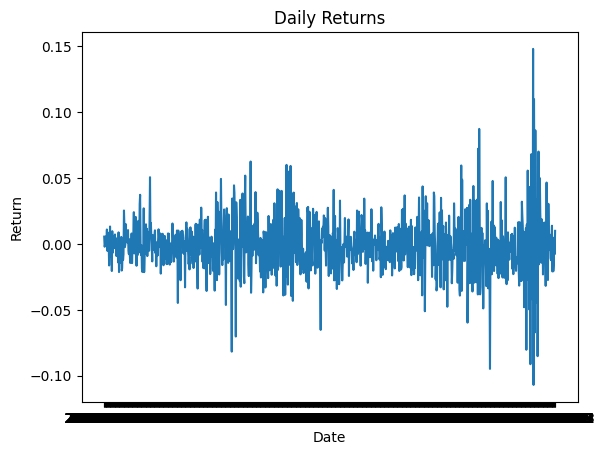

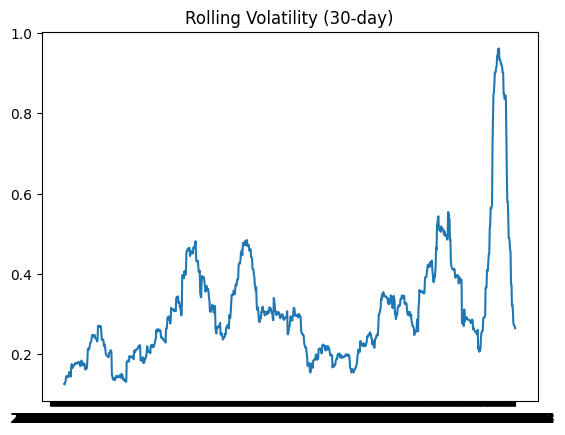

In [ ]:
import requests
import pandas as pd

api_key = 'P3WCNPd5MmhS35ZtJ4qCiih6qmhGYWYo'
base_url = 'https://financialmodelingprep.com/api/v3/'

# Example function to get stock price data
def get_stock_data(ticker, start_date, end_date):
    url = f"{base_url}historical-price-full/{ticker}?from={start_date}&to={end_date}&apikey={api_key}"
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data['historical'])
    return df

# Example usage
stock_data = get_stock_data('AAPL', '2020-01-01', '2024-01-01')
print(stock_data.head())
import numpy as np

# Function to calculate daily returns
def calculate_daily_returns(df):
    df['daily_return'] = df['close'].pct_change()
    return df

# Function to calculate volatility
def calculate_volatility(df):
    return df['daily_return'].std() * np.sqrt(252)

# Example usage
stock_data = calculate_daily_returns(stock_data)
stock_volatility = calculate_volatility(stock_data)
print(f"Stock Volatility: {stock_volatility}")
import matplotlib.pyplot as plt

plt.plot(stock_data['date'], stock_data['daily_return'])
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()
stock_data['rolling_volatility'] = stock_data['daily_return'].rolling(window=30).std() * np.sqrt(252)
plt.plot(stock_data['date'], stock_data['rolling_volatility'])
plt.title('Rolling Volatility (30-day)')
plt.show()



1006    75.014444
1007    74.960465
1008    74.972267
1009    74.946763
1010    74.976747
1011    74.973370
1012    74.971016
1013    74.971421
1014    74.970334
1015    74.971573
Name: predicted_mean, dtype: float64


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbijohc7f/du4x0wf2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbijohc7f/gzg00o01.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56977', 'data', 'file=/tmp/tmpbijohc7f/du4x0wf2.json', 'init=/tmp/tmpbijohc7f/gzg00o01.json', 'output', 'file=/tmp/tmpbijohc7f/prophet_modelr_q6rhwo/prophet_model-20250220191023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:10:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:10:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds        yhat  yhat_lower  yhat_upper
0    2020-01-02   74.410737   65.524019   82.868710
1    2020-01-03   74.106286   65.744366   82.268501
2    2020-01-06   73.714788   65.062555   82.521212
3    2020-01-07   73.363623   65.209502   82.330105
4    2020-01-08   73.254053   64.121928   81.528256
...         ...         ...         ...         ...
1011 2024-01-04  194.344431  186.116916  203.220360
1012 2024-01-05  194.194466  185.366736  203.291773
1013 2024-01-06  193.809664  185.205636  203.388749
1014 2024-01-07  193.747151  184.884441  202.734864
1015 2024-01-08  194.313488  185.131886  203.606737

[1016 rows x 4 columns]


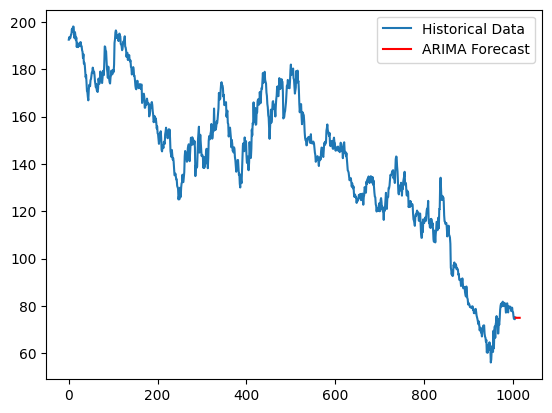

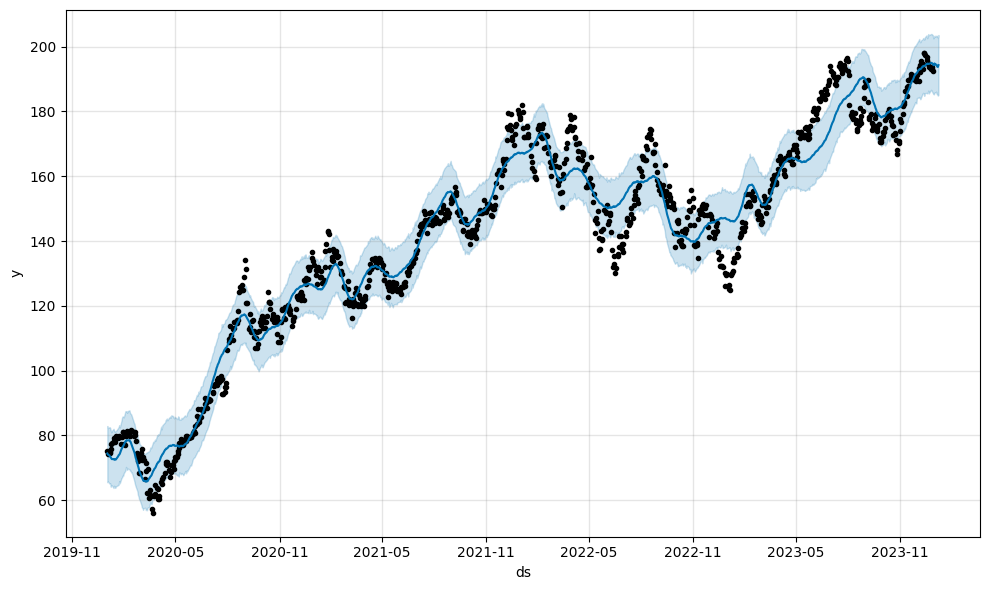

In [ ]:

from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

# ARIMA Model Example
model = ARIMA(stock_data['close'], order=(5, 1, 0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=10)
print(forecast)

# Prophet Model Example
stock_data_prophet = stock_data[['date', 'close']].rename(columns={'date': 'ds', 'close': 'y'})
model_prophet = Prophet()
model_prophet.fit(stock_data_prophet)
future = model_prophet.make_future_dataframe(periods=10)
forecast_prophet = model_prophet.predict(future)
print(forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
import matplotlib.pyplot as plt

# ARIMA Plot
plt.plot(stock_data['close'], label='Historical Data')
plt.plot(range(len(stock_data), len(stock_data)+10), forecast, label='ARIMA Forecast', color='red')
plt.legend()
plt.show()

# Prophet Plot
model_prophet.plot(forecast_prophet)
plt.show()

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import numpy as np
import requests
import plotly.graph_objs as go

# FMP API settings
api_key = 'P3WCNPd5MmhS35ZtJ4qCiih6qmhGYWYo'
base_url = 'https://financialmodelingprep.com/api/v3/'

# Function to fetch stock prices
def fetch_stock_data(ticker, n=30):
    url = f"{base_url}historical-price-full/{ticker}?apikey={api_key}&serietype=line&timeseries={n}"
    response = requests.get(url)
    data = response.json()
    if 'historical' in data:
        df = pd.DataFrame(data['historical'])
        df['date'] = pd.to_datetime(df['date'])
        df = df.sort_values('date')
        return df[['date', 'close']]
    return pd.DataFrame(columns=['date', 'close'])

# Function to calculate rolling volatility
def calculate_volatility(prices, window=10):
    returns = prices['close'].pct_change()
    rolling_volatility = returns.rolling(window=window).std() * np.sqrt(252)  # Annualized
    return rolling_volatility

# Function to calculate Value at Risk (VaR)
def calculate_var(prices, confidence=0.95):
    returns = prices['close'].pct_change().dropna()
    var = np.percentile(returns, (1 - confidence) * 100)  # Quantile for losses
    return var

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Real-Time Risk Analysis Dashboard"),
    dcc.Input(
        id='ticker-input',
        type='text',
        value='AAPL',
        placeholder='Enter Stock Ticker',
        style={'margin-bottom': '20px', 'width': '300px'}
    ),
    html.Div([
        dcc.Input(
            id='window-size',
            type='number',
            value=10,
            placeholder='Rolling Window (days)',
            style={'margin-right': '20px'}
        ),
        dcc.Input(
            id='confidence-level',
            type='number',
            value=95,
            placeholder='VaR Confidence (%)',
            style={'margin-right': '20px'}
        )
    ], style={'margin-bottom': '20px'}),
    dcc.Graph(id='price-graph'),
    dcc.Graph(id='volatility-graph'),
    html.Div(id='var-output', style={'fontSize': 18, 'margin-top': '20px'}),
    dcc.Interval(
        id='interval-component',
        interval=60*1000,  # Refresh every 60 seconds
        n_intervals=0
    )
], style={'padding': '20px', 'fontFamily': 'Arial'})

# Callback to update graphs and risk metrics
@app.callback(
    [Output('price-graph', 'figure'),
     Output('volatility-graph', 'figure'),
     Output('var-output', 'children')],
    [Input('ticker-input', 'value'),
     Input('window-size', 'value'),
     Input('confidence-level', 'value'),
     Input('interval-component', 'n_intervals')]
)
def update_graph(ticker, window, confidence, n_intervals):
    try:
        # Fetch real-time stock data
        stock_data = fetch_stock_data(ticker, n=30)
        if stock_data.empty:
            return {
                'data': [],
                'layout': {'title': f'No data available for {ticker}'}
            }, {
                'data': [],
                'layout': {'title': 'No data available'}
            }, f"No data available for {ticker}. Check the ticker symbol or API connection."

        # Calculate rolling volatility
        stock_data['volatility'] = calculate_volatility(stock_data, window=window).dropna()

        # Calculate Value at Risk
        var = calculate_var(stock_data, confidence=confidence/100)

        # Price Graph
        price_figure = {
            'data': [
                go.Scatter(
                    x=stock_data['date'],
                    y=stock_data['close'],
                    mode='lines',
                    name='Price'
                )
            ],
            'layout': {'title': f'Real-Time Stock Price for {ticker}'}
        }

        # Volatility Graph
        volatility_figure = {
            'data': [
                go.Scatter(
                    x=stock_data['date'],
                    y=stock_data['volatility'],
                    mode='lines',
                    name='Volatility'
                )
            ],
            'layout': {'title': f'Rolling Volatility for {ticker}'}
        }

        # VaR Output
        var_output = f"Estimated Daily VaR (95% confidence): {var:.2%}. This implies a potential daily loss of {abs(var * stock_data['close'].iloc[-1]):.2f} USD."

        return price_figure, volatility_figure, var_output
    except Exception as e:
        return {
            'data': [],
            'layout': {'title': 'Error fetching or calculating data'}
        }, {
            'data': [],
            'layout': {'title': 'Error calculating data'}
        }, f"Error: {str(e)}"

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import numpy as np
import yfinance as yf
import cvxpy as cp
import plotly.graph_objs as go

# List of stocks to monitor
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN']

# Function to fetch real-time stock data
def fetch_real_time_data(tickers, period='1y'):
    stock_data = yf.download(tickers, period=period)['Adj Close']
    return stock_data

# Function to optimize portfolio
def optimize_portfolio(stock_data):
    # Calculate daily returns and covariance matrix
    returns = stock_data.pct_change().mean()
    covariance_matrix = stock_data.pct_change().cov()

    n_assets = len(returns)
    weights = cp.Variable(n_assets)

    # Objective: Minimize portfolio variance
    objective = cp.Minimize(cp.quad_form(weights, covariance_matrix))

    # Constraints: Weights must sum to 1 and be non-negative
    constraints = [cp.sum(weights) == 1, weights >= 0]

    # Solve the optimization problem
    prob = cp.Problem(objective, constraints)
    prob.solve()

    # Optimal weights
    weights_value = weights.value

    # Portfolio expected return and risk
    expected_return = np.dot(returns, weights_value)
    portfolio_risk = np.sqrt(np.dot(weights_value.T, np.dot(covariance_matrix, weights_value)))

    return weights_value, portfolio_risk, expected_return

# Function to calculate Value at Risk (VaR)
def calculate_var(stock_data, confidence=0.95):
    returns = stock_data.pct_change().dropna()
    portfolio_returns = returns.mean(axis=1)
    var = np.percentile(portfolio_returns, (1 - confidence) * 100)  # Quantile for losses
    return var

# Dash app initialization
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Real-Time Portfolio Optimization Dashboard"),
    html.Div([
        dcc.Dropdown(
            id='period-selector',
            options=[
                {'label': '1 Month', 'value': '1mo'},
                {'label': '3 Months', 'value': '3mo'},
                {'label': '6 Months', 'value': '6mo'},
                {'label': '1 Year', 'value': '1y'}
            ],
            value='1y',
            placeholder="Select time period"
        )
    ]),
    dcc.Graph(id='portfolio-weights-graph'),
    dcc.Graph(id='portfolio-risk-return-graph'),
    html.Div(id='var-output'),
    dcc.Interval(
        id='interval-update',
        interval=60 * 1000,  # Update every 60 seconds
        n_intervals=0
    )
])

# Callback for updating graphs and metrics
@app.callback(
    [
        Output('portfolio-weights-graph', 'figure'),
        Output('portfolio-risk-return-graph', 'figure'),
        Output('var-output', 'children')
    ],
    [Input('period-selector', 'value'),
     Input('interval-update', 'n_intervals')]
)
def update_dashboard(period, n_intervals):
    # Fetch real-time data
    stock_data = fetch_real_time_data(tickers, period=period)

    # Perform portfolio optimization
    weights, risk, expected_return = optimize_portfolio(stock_data)

    # Calculate VaR
    var = calculate_var(stock_data)

    # Portfolio Weights Graph
    weights_figure = {
        'data': [
            go.Bar(x=tickers, y=weights, name='Portfolio Weights')
        ],
        'layout': {'title': "Optimal Portfolio Weights"}
    }

    # Portfolio Risk vs. Return Graph
    risk_return_figure = {
        'data': [
            go.Scatter(
                x=[risk], y=[expected_return],
                mode='markers',
                marker=dict(size=12, color='red'),
                name='Portfolio'
            )
        ],
        'layout': {
            'title': "Portfolio Risk vs. Return",
            'xaxis': {'title': 'Risk (Standard Deviation)'},
            'yaxis': {'title': 'Expected Return'}
        }
    }

    # VaR Output
    var_output = f"Estimated Daily Value at Risk (VaR) at 95% confidence: {var:.2%}"

    return weights_figure, risk_return_figure, var_output

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

Optimal weights: [1.04473458e-02 2.38953207e-01 2.13971207e-01 9.24952239e-27
 1.33112386e-01 2.07589014e-02 9.30978663e-04 2.07321206e-01
 1.22087008e-04 1.74382682e-01]
Expected return: 140.50%
Portfolio risk (standard deviation): 176.37%


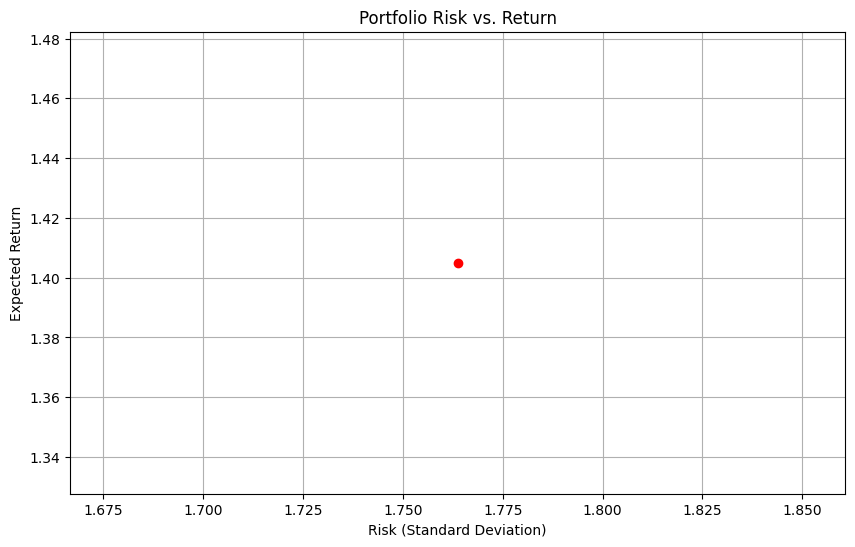

Estimated Daily VaR (95% confidence): 149.84%


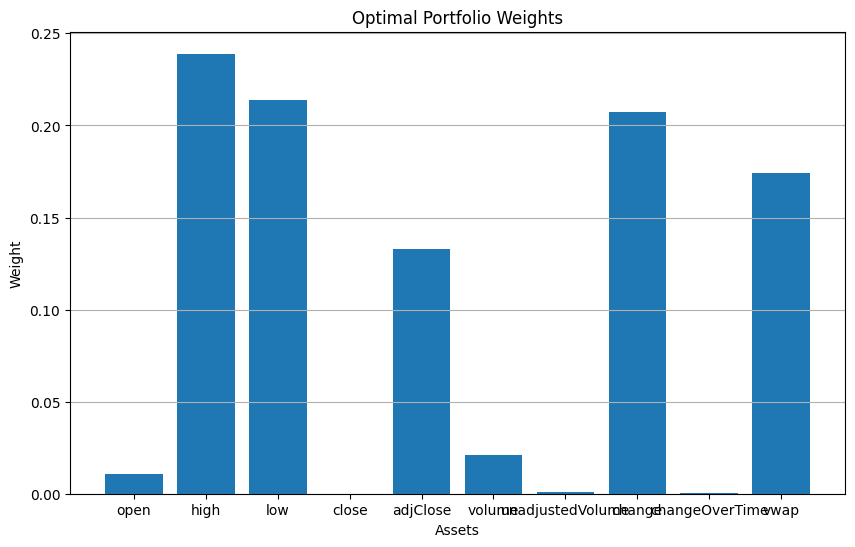

In [ ]:
import cvxpy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the stock data (ensure stock_data is a DataFrame with columns: 'open', 'high', 'low', 'close', 'adjClose', 'volume', etc.)
# You need to replace this with your actual data loading method
stock_data = pd.DataFrame({
    'open': np.random.rand(100),
    'high': np.random.rand(100),
    'low': np.random.rand(100),
    'close': np.random.rand(100),
    'adjClose': np.random.rand(100),
    'volume': np.random.rand(100),
    'unadjustedVolume': np.random.rand(100),
    'change': np.random.rand(100),
    'changeOverTime': np.random.rand(100),
    'vwap': np.random.rand(100)
})

# Define the relevant columns for calculation
numeric_columns = ['open', 'high', 'low', 'close', 'adjClose', 'volume', 'unadjustedVolume', 'change', 'changeOverTime', 'vwap']

# Calculate returns and the covariance matrix
returns = stock_data[numeric_columns].pct_change().mean()
covariance_matrix = stock_data[numeric_columns].pct_change().cov()

# Number of assets
n_assets = len(returns)

# Define the variable for asset weights
weights = cp.Variable(n_assets)

# Objective: Minimize the portfolio variance (risk)
objective = cp.Minimize(cp.quad_form(weights, covariance_matrix))

# Set a minimum expected return constraint (optional)
min_expected_return = 0.02  # Adjust to your desired threshold
constraints = [cp.sum(weights) == 1, weights >= 0, cp.matmul(returns.values, weights) >= min_expected_return]

# Problem setup and solution
prob = cp.Problem(objective, constraints)
prob.solve()

# Print optimal weights
print(f"Optimal weights: {weights.value}")

# Calculate expected return and risk of the portfolio
expected_return = returns @ weights.value  # Portfolio expected return
portfolio_risk = np.sqrt(weights.value.T @ covariance_matrix @ weights.value)  # Portfolio standard deviation

print(f"Expected return: {expected_return:.2%}")
print(f"Portfolio risk (standard deviation): {portfolio_risk:.2%}")

# Plot the risk vs. return graph
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_risk, expected_return, color='red')
plt.title('Portfolio Risk vs. Return')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.grid(True)
plt.show()

# Calculate VaR at 95% confidence level
alpha = 0.05  # Confidence level (95% VaR)
portfolio_return_simulations = np.random.multivariate_normal(returns.values, covariance_matrix, 10000).dot(weights.value)
VaR_95 = -np.percentile(portfolio_return_simulations, alpha * 100)

print(f"Estimated Daily VaR (95% confidence): {VaR_95:.2%}")

# Optional: Plot the portfolio allocation (weights)
plt.figure(figsize=(10, 6))
plt.bar(range(n_assets), weights.value, tick_label=returns.index)
plt.title('Optimal Portfolio Weights')
plt.xlabel('Assets')
plt.ylabel('Weight')
plt.grid(axis='y')
plt.show()
